# Day 03: Linear Regression and MSE
Linear regression is modelling the relationship between a dependent variable (target) and indedependent variable(s) (inputs).

In [1]:
import numpy as np
import pandas as pd

insurance = pd.read_csv('insurance.csv')

## Simple Single Linear Regression
Single linear regression uses a single independent variable to find a relationship between it and the dependent variable. In the example for this file, I will use a patient's BMI as the single independent variable, and the dependent variable will be the patient's charge (cost of insurance).

### Using Sklearn

In [2]:
from sklearn.linear_model import LinearRegression

Use `bmi` as the X to predict `charges` y.

In [3]:
# Sklearn takes numpy arrays
# Sklearn DOES NOT take pandas dataframes
X = insurance['bmi'].values # Extract the values from the dataframe to create a 1D array (horizontal)
X = X.reshape([len(X),1]) # Reshape X to create a 2D array (vertical)

y = insurance['charges'].values
y = y.reshape([len(y), 1])

In [4]:
# Create and fit the Linear Regression model
linreg_model = LinearRegression().fit(X,y)

In [5]:
print(linreg_model.coef_)
print(linreg_model.intercept_)

[[393.8730308]]
[1192.93720896]


The coefficient is the value that you multiply with the X-values.\
The intercept is the y-intercept of the model. Where x=0


The formula would be:\
**Y = 393.8730308(𝒳) + 1192.93720896**

To visualize:

In [6]:
import matplotlib.pyplot as plt

In [7]:
predictions = [] # List of predicted values
for b in insurance['bmi']:
    charge_predict = 393.8730308*b + 1192.93720896 # Formula is using the model's coefficient and intercept
    predictions.append(charge_predict)

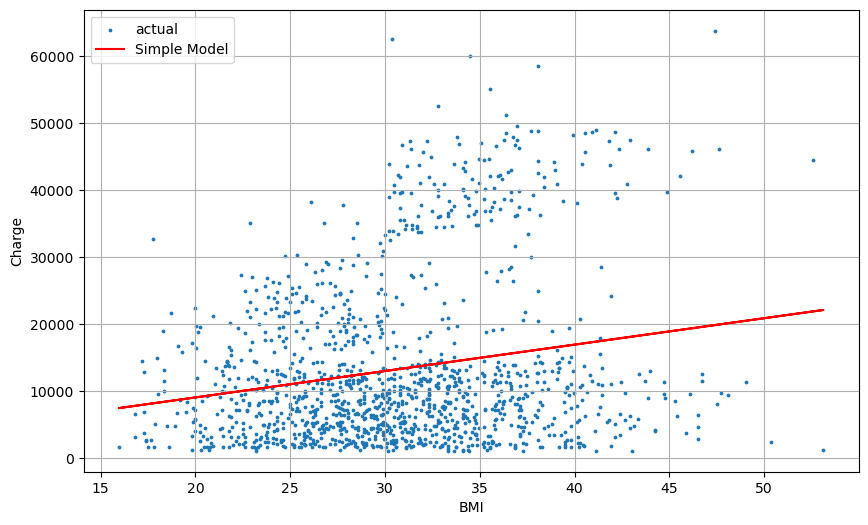

In [8]:
# Matplotlib plot
plt.figure(figsize=(10,6))
plt.scatter(insurance.bmi, insurance.charges, s=3, label='actual')
plt.plot(insurance.bmi, predictions, c='r', label='Simple Model')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Charge')
plt.grid()

#### Plot using Seaborn
Seaborn's `.regplot` will automatically perform a regression between the variables and plot their relationship with a confidence interval. BUT this only works with single-variable regressions; it will not be able to perform multi-variable regression.\
In addition, this does not output a model, just a plot. There is no way to extract the intercepts, coefficients, or regression formula out of this function to use it elsewhere.

But for this demonstration, this will do.

In [9]:
import seaborn as sns

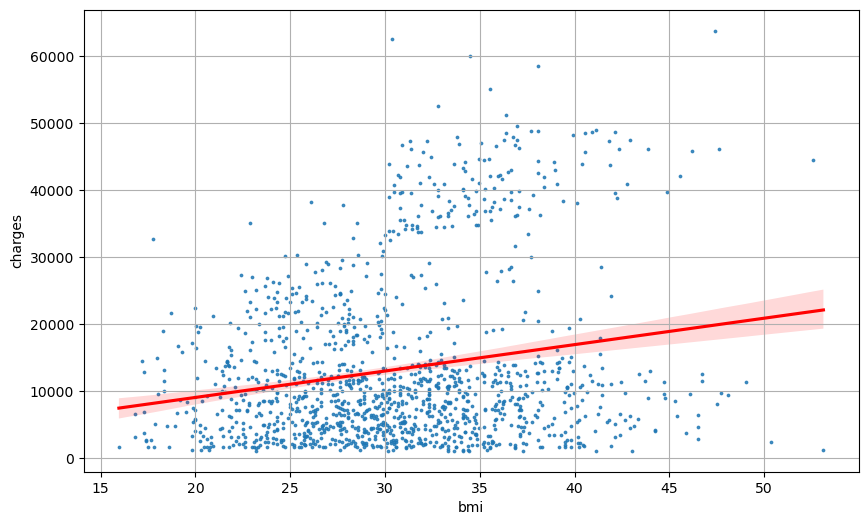

In [10]:
# Seaborn regplot
plt.figure(figsize=(10,6))
sns.regplot(x = insurance.bmi,y = insurance.charges, scatter_kws={'s':3}, line_kws={'color':'r'})
plt.grid()

Clearly not a good model. But what did we expect using a single variable linear regression model?

### Using Statsmodels
Unlike sklearn, **statsmodels** will provide statistical information on a model formatted as a nice easy-to-read table.

In [11]:
import statsmodels.formula.api as smf

In [12]:
sm_model = smf.ols('charges~bmi', insurance).fit()
sm_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1192.9372,1664.802,0.717,0.474,-2072.974,4458.849
bmi,393.8730,53.251,7.397,0.000,289.409,498.337


Let's compare the coefficients with sklearn's.

In [13]:
print("Intercept:", np.round(linreg_model.intercept_, 4))
print("bmi coefficient:", np.round(linreg_model.coef_, 4))

Intercept: [1192.9372]
bmi coefficient: [[393.873]]


The values match. But notice how statsmodels has more info (standard error, t-statistic, etc.).\
Below is the full output:

In [14]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           2.46e-13
Time:                        16:01:19   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can get a lot more data from this.

## Error and MSE
No model is perfect; there will always be some error. Some of the error cannot be reduced (irreducible) but some of the error CAN be reduced. The latter is what we must try and reduce as much as possible.

**What is Error? How do we calculate it?** \
Error (or noise) is the inevitable variance we encounter in the real life. No matter how perfect we can try to create a model to predict an outcome, there is the chance for variance and the unexpected. Thus, creating the "perfect" model is actually NOT a good idea; the perfect model does not account for errors / variance in data, and will be too accurate for the real world. That said, we don't want too much error, as that will lead to a model that is just simply wrong.

In mathematical terms, error is calculated by finding the difference between the model's predicted output, and the actual result. This can be done by creating said model by way of a mathematical equation in the format of:

f(x) = Bx + I + E

Where:\
*x* is the data being inputted\
*B* is the coefficient(s) calculated\
*I* is the intercept where no data is being inputted (think of y-intercept)\
*E* is the irreducible error (random error that we can not ignore)\
*f(X)* is the model's predicted outputs

Say *Y* is the actual reported result of the data in *x*. The error would then be:

Error = Y - f(x)

Keep in mind that the irreducible error is not a set number. It is impossible to find a consistent number for this value, as this represents a random error value that may change for every data of *x*. The inclusion of *E* in the formula above is to show where it stands in a formula; no model will be able to predict a value for it.


**MSE- Mean Squared Error**\
The average of the squared errors. Find the errors by finding the difference between the model's predicted values (ŷ) and the actual values (y) for the observations of 𝒳. Sum the squared values of the errors, then find the mean of the squared sum (MSE).\
We want a MSE value that is small, as that means less error. However, a MSE that is too small can lead to overfitting (too accurate and including the data's noise (irreducible error)) into the model.

Example: A very small MSE for a training dataset will lead to a very accurate model that may be lead to excellent responses for the train-response data. However, applying the same model - which may look very accurate - can lead to poor performance on the testing dataset, because the model can be overfitting on the trainiing data's noise, and not be as general/applicable to variances in the testing data.

Let's find the MSE with python for the example of a patient's BMI and insurance charge.

In [15]:
def get_mean_squared_error(predictions, actual):
    '''
    predictions: List of predicted outputs from our model
    actual: List of the actual outputs from the data
    
    sse = The sum of squared errors
    '''
    sse = 0
        
    for num in range(len(predictions)):
        error = actual[num] - predictions[num] # Get the error
        error = error**2 # Squared error
        sse += error # Add squared error to sum
    
    mse = sse / len(predictions) # Divide sum of squared errors by number of observations to get the mean
    return mse

In [16]:
predictions = sm_model.predict(insurance['bmi'])
print('Predicted charges from statsmodels:')
print(predictions.head(4))
print()
print('Actual charges')
print(insurance['charges'].head(4))

Predicted charges from statsmodels:
0    12181.994768
1    14494.029459
2    14190.747225
3    10135.824373
dtype: float64

Actual charges
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
Name: charges, dtype: float64


In [17]:
mse = get_mean_squared_error(predictions, insurance['charges'])
print(mse)

140777900.09850746


MSE is very large, which indicates a weak model. This supports the above plots, which don't show a strong relationship between BMI and charge.

In [18]:
# Double check using a shorter matrix math:
squared_errors = ((insurance.charges - predictions)**2)
sum(squared_errors) / len(insurance.charges)

140777900.09850746

Using just a patient's BMI does not appear to be helpful in determining a patient's health insurance cost. Creating a model with more variables will probably help.\
Enter ***multi linear regression***.